In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

In [3]:
train_df = pd.read_csv("../datasets/fashion-mnist_train.csv")
test_df = pd.read_csv("../datasets/fashion-mnist_test.csv")

In [4]:
print(train_df.shape)

(60000, 785)


In [5]:
print(train_df.describe())

              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169    

In [6]:
print(train_df.info())
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [7]:
print("Unique Labels")
print(train_df.label.unique())

Unique Labels
[2 9 6 0 3 4 5 8 7 1]


In [8]:
class_names = [
    "Tshirt/Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot"
]
#TTPDCSSSBA

In [9]:
X_train = train_df.drop(
    'label', axis=1
).values.reshape(-1, 28, 28, 1)/255.0

In [10]:
X_test = test_df.drop(
    'label', axis=1
).values.reshape(-1, 28, 28, 1)/255.0

In [11]:
y_train = train_df['label'].values
y_train

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [12]:
y_test = test_df['label'].values
y_test

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

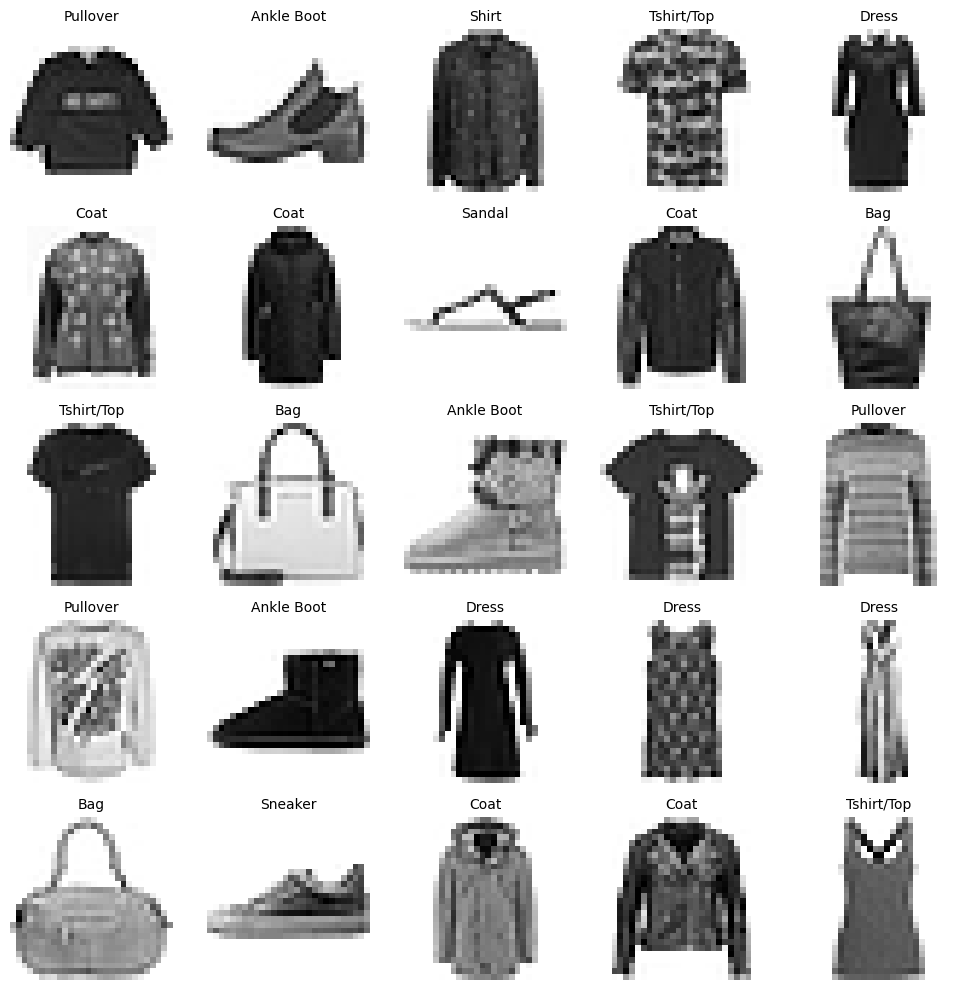

In [13]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.title(f"{class_names[y_train[i]]}", fontsize=10)
plt.tight_layout()
plt.show()

In [39]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10, activation="softmax")
])

In [16]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = [
        "accuracy"
    ]
)

In [17]:
history = model.fit(
    X_train,
    y_train,
    epochs = 5,
    batch_size = 64,
    validation_data = (X_test, y_test)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7737 - loss: 0.6735 - val_accuracy: 0.8837 - val_loss: 0.3468
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8819 - loss: 0.3393 - val_accuracy: 0.8982 - val_loss: 0.3024
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8970 - loss: 0.2912 - val_accuracy: 0.9026 - val_loss: 0.2838
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9056 - loss: 0.2704 - val_accuracy: 0.9027 - val_loss: 0.2785
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9111 - loss: 0.2510 - val_accuracy: 0.9036 - val_loss: 0.2679


In [18]:
model.fit?

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `tf.data.Dataset`. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `keras.utils.PyDataset` returning `(inputs,
      

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

In [20]:
accuracy = model.evaluate(
    X_test,
    y_test
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8970 - loss: 0.2735


In [21]:
y_probas = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [22]:
y_pred = y_probas.argmax(axis=-1)

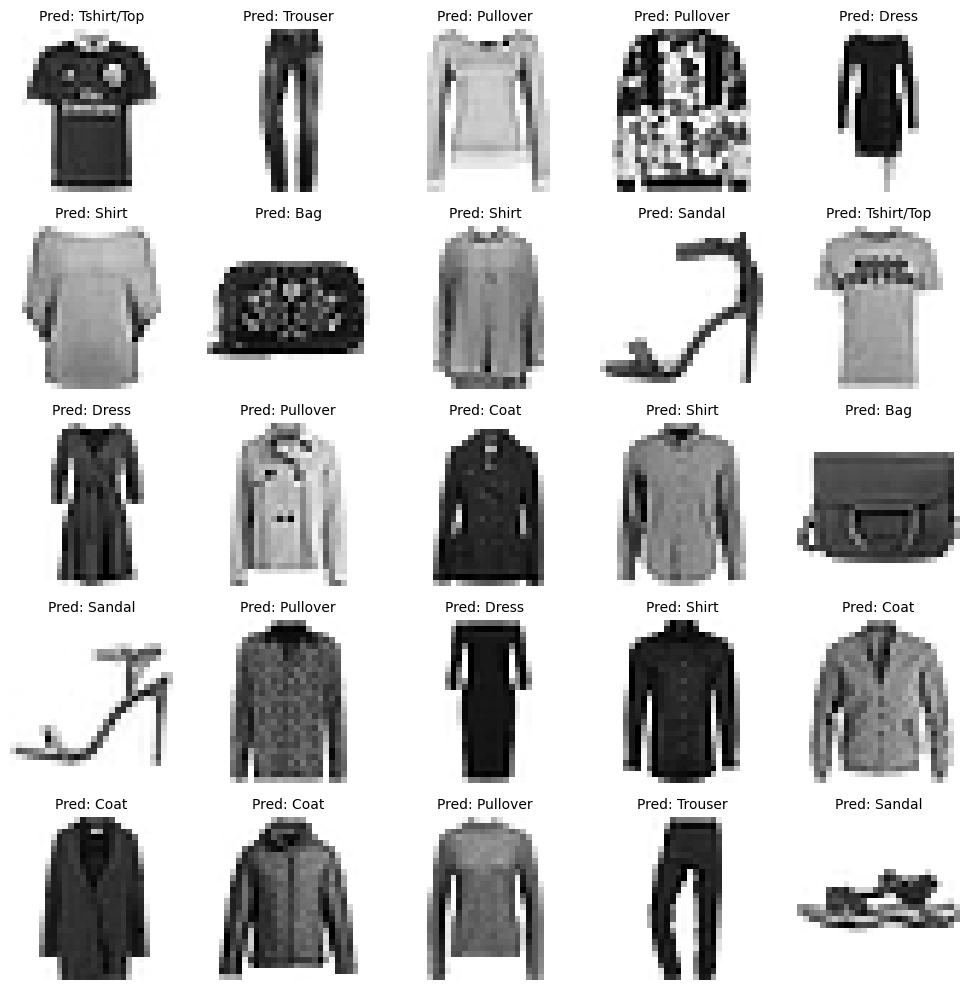

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.title(f"Pred: {class_names[y_pred[i]]}", fontsize=10)
plt.tight_layout()
plt.show()

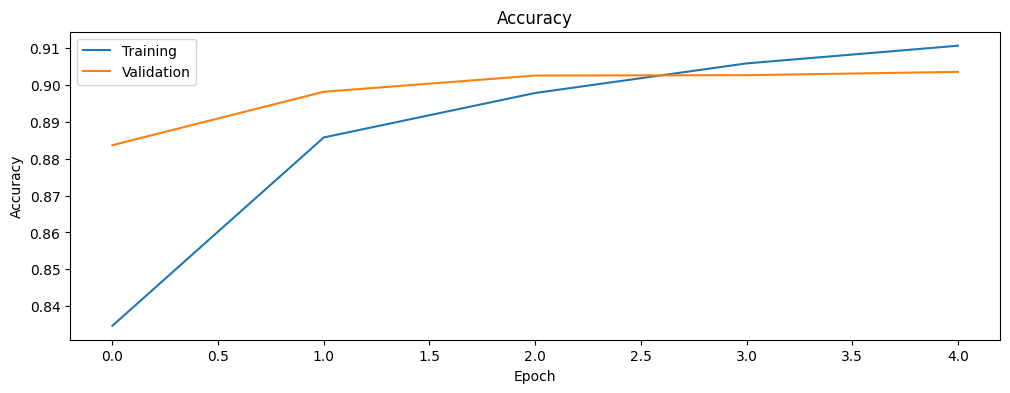

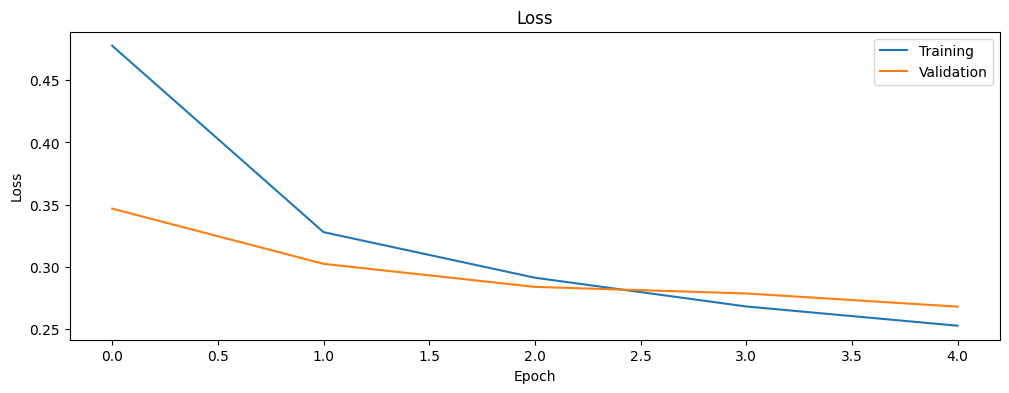

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(
    history.history['accuracy'],
    label = 'Training'
)
plt.plot(
    history.history['val_accuracy'],
    label = 'Validation'
)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
# plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(
    history.history['loss'],
    label = 'Training'
)
plt.plot(
    history.history['val_loss'],
    label = 'Validation'
)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


# plt.tight_layout()
plt.show()